**Assignment 4**

**Name : Ramakrishna Reddy Are**

**Roll No : 197212**

**Section : BTech III year CSE-B**

**Date : 04-02-2022**

**Polynomial Regression**

In [35]:
# import the required libraries
import pandas as pd                                             # importing pandas as pd
import numpy as np                                              # importing numpy as np     
import matplotlib.pyplot as plt                                 # importing matplotlib.pyplot as plt

**Using Dataset**
[Position_Salaries.csv](https://www.kaggle.com/jaypradipshah/polynomial-regression-from-scratch/data?select=Position_Salaries.csv)

In [36]:
dataset=pd.read_csv("Position_Salaries.csv")                    # importing the dataset using read_csv                    

In [37]:
print(dataset)                                                  # printing the dataset

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [38]:
# assigning independent and dependent variable to X and Y
X=np.asarray(dataset['Level'],dtype='float')                                          # assigning X0 and Level columns to independent variable X
Y=np.asarray(dataset['Salary'],dtype='float')                                         # assigning the salary to dependent variable Y
print(X)                                                                              # printing values of X
print(Y)                                                                              # printing values of Y

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]


In [39]:
# for forming a polynomial using features
def Polynomialdegree(X,n):                                                      # function to form a polynomial and return it
  Y=np.ones(len(X))                                                             # Y is a temp array to return 
  for i in range(2,n+1):                                                        # Y is having all the arrays raised to the power
    Y=np.c_[Y,X**i]
  return Y                                                                      # Y is having the features raised to respective powers

In [40]:
# forming features for given degree
X=Polynomialdegree(X,3)
print(X)

[[   1.    1.    1.]
 [   1.    4.    8.]
 [   1.    9.   27.]
 [   1.   16.   64.]
 [   1.   25.  125.]
 [   1.   36.  216.]
 [   1.   49.  343.]
 [   1.   64.  512.]
 [   1.   81.  729.]
 [   1.  100. 1000.]]


In [41]:
# standardizing the dataset
m=len(X)
n=X.shape[1]
for i in range(n):
  mean=0                                                        # for mean of each column
  sd=0                                                          # for standard deviation of each column
  for j in range(m):
    mean+=X[j][i]
  mean = mean/m                                                 # finding mean of each column
  for j in range(m):
    sd+=((X[j][i]-mean)**2)                          
  sd=sd/(m-1)
  sd = np.sqrt(sd)                                              # finding standard deviation of each column
  for j in range(m):
    cell=X[j][i]
    if(sd>0):
      X[j][i]=(cell-mean)/sd                                    # replacing the data in the dataset with standardized value

In [42]:
def polynomialregression(X,Y,alpha,epochs):             # alpha is the learning rate or step length and epochs is the number of iterations to train the data
  theta = np.zeros(X.shape[1])                          # initializing all the coefficients with 0s   
  m = (int)(len(X))                                     # size of the training data
  for i in range(epochs):
    h = X.dot(theta)                                    # h is the predicted value by the present coefficients
    pdtheta = X.T.dot(h-Y)                              # value of partial derivative wrt theta                                  
    theta = theta - alpha*pdtheta/m                     # updating the value of theta at every iteration
  return theta                                          # returning the coefficients of xi

In [43]:
theta=polynomialregression(X,Y,0.1,1000)                # finding the coefficients of polynomial
print(theta)                                            # printing values of coefficients

[ 249500.         -238070.38814719  518959.28677209]


In [44]:
def predicted(X,theta):                                 # predicting the value of X 
  return X.dot(theta)
Y_pred=predicted(X,theta)                               # predicting the values using X and coefficients
print(Y_pred)                                           # printing the predicted values

[ 55540.76836331  45209.81804931  39063.39685986  46160.27424998
  75559.21967464 136319.00258887 237498.39244766 388156.15870601
 597351.07081893 874141.89824141]


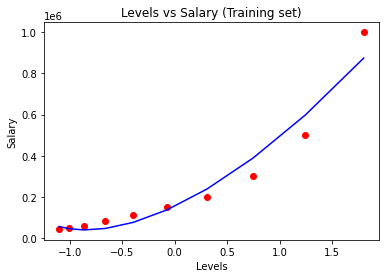

In [45]:
# plotting the graph of scatter points and regression line
plt.scatter(X[:,1], Y, color = 'red')                                              # plotting graph of training dataset of scatter points color = red
plt.plot(X[:,1], Y_pred, color = 'blue')                                           # plotting the regression line after predicting the training data
plt.title('Levels vs Salary (Training set)')                                       # giving the title to the graph
plt.xlabel('Levels')                                                               # labelling the x-coordinate of graph
plt.ylabel('Salary')                                                               # labelling the y-coordinate of graph
plt.show()                                                                         # plotting the graph

In [46]:
# Calculate the error / accuracy of the model using root mean squared error
n=(int)(len(Y))                                           # size of the test dataset
mae=0                                                     # mean absolute error
rms=0                                                     # root mean squared error
for i in range(n):                            
  mae+=abs(Y[i]-Y_pred[i])                                # calculating mean absolute error
  rms+=(Y[i]-Y_pred[i])**2                                # calculating root mean square error
mae/=n                                                    # calculating mean absolute error
rms/=n                                                    # calculating root mean square error
mae=float(mae)
rms=np.sqrt(rms)
rms=float(rms)
print("Mean Absolute Error : ",mae)                       # printing mean absolute error
print("Root Mean Squared Error : ",rms)                   # printing root mean square error

Mean Absolute Error :  46709.278067184125
Root Mean Squared Error :  61307.4135746267
